**This code is for importing csv with underlying assets and saving DPI's underlying assets in a separate beautiful dataframe, for further concatenating with final big dataframe for regression modeling**

In [2]:
# import requests
import pandas as pd
import numpy as np 

In [1]:
# Import Drive API and authenticate.
from google.colab import drive
# Mount your Drive to the Colab VM.
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
# reading the big df with all assets
def load_underlying_assets(path_to_file, array_of_underlying_assets):
  all_assets = pd.read_csv(path_to_file) 
  all_assets = all_assets.rename(columns={'day': 'Date'})
  all_assets['Date'] = all_assets['Date'].astype('datetime64[ns]') 
  all_assets = all_assets.set_index(['Date']) 

  # list of smaller dataframes with single asset 
  list_of_df = list() 

  for asset in array_of_underlying_assets:
    temp_df = pd.DataFrame() 
    temp_df = all_assets.loc[all_assets['symbol'] == asset] 
    temp_df = temp_df.drop(['symbol'], axis=1) 
    # temp_df[asset+'_returns'] = temp_df['price'].pct_change() 
    temp_df = temp_df.rename(columns={'price': asset+'_price'})
    # temp_df = temp_df.drop(columns = 'price')
    list_of_df.append(temp_df) 

  # final dataframe with underlying assets 
  underlying_assets = pd.DataFrame() 

  for asset in list_of_df:
    underlying_assets = pd.concat([underlying_assets, asset], axis=1) 

  return underlying_assets 

In [8]:
#  checking defined function
#  thanks god it works, and Nils won't beat me badly for defining useless function 

# path to file 
path = '/content/gdrive/My Drive/IndexCoop Capstone/CSV data files/Underlying Assets Data.csv' 

# our DPI assets' symbols 
DPI_asset_symbols = ['UNI', 'AAVE', 'MKR', 'SNX', 'COMP'] 

underl_assets = load_underlying_assets(path, DPI_asset_symbols)




In [9]:
underl_assets.to_csv('/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/datasets/underl_assets_returns_222.csv', index=True)  

underl_assets 

,UNI_price,AAVE_price,MKR_price,SNX_price,COMP_price
Date,,,,,
2020-09-10,NaN,NaN,540.112849,5.372491,178.511140
2020-09-11,NaN,NaN,525.912618,5.717264,171.727958
2020-09-12,NaN,NaN,518.839021,5.873410,174.169326
2020-09-13,NaN,NaN,502.836368,5.637194,173.293326
2020-09-14,NaN,NaN,494.940965,5.381208,165.929618
...,...,...,...,...,...
2022-10-09,6.576160,75.187521,883.540729,2.243278,59.201986
2022-10-10,6.446736,74.900729,937.946146,2.219569,58.785951
2022-10-11,6.227431,72.462750,964.408833,2.082187,56.397208


In [10]:
underl_corr = underl_assets.corr() 

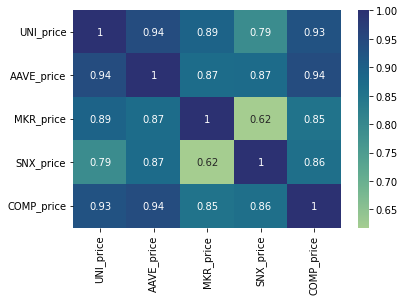

In [11]:
import seaborn as sns

sns.heatmap(underl_corr, annot=True, cmap='crest') 